In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from scipy.stats import percentileofscore

plt.style.use('fivethirtyeight')
print("Modules imported!")

Modules imported!


In [ ]:
games = pd.read_csv('drive/MyDrive/Basketball/games.csv')
games_details = pd.read_csv('drive/MyDrive/Basketball/games_details.csv')

print(games)
print(games_details)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


      GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0        2022-03-12  22101005            Final    1610612748       1610612750   
1        2022-03-12  22101006            Final    1610612741       1610612739   
2        2022-03-12  22101007            Final    1610612759       1610612754   
3        2022-03-12  22101008            Final    1610612744       1610612749   
4        2022-03-12  22101009            Final    1610612743       1610612761   
...             ...       ...              ...           ...              ...   
25791    2014-10-06  11400007            Final    1610612737       1610612740   
25792    2014-10-06  11400004            Final    1610612741       1610612764   
25793    2014-10-06  11400005            Final    1610612747       1610612743   
25794    2014-10-05  11400002            Final    1610612761       1610612758   
25795    2014-10-04  11400001            Final    1610612748       1610612740   

       SEASON  TEAM_ID_home

In [ ]:
id2season = {id: games[games['GAME_ID']==int(id)]['SEASON'] for id in np.unique(games_details['GAME_ID'])}
for i in id2season.keys():
  try:
    id2season[i] = int(id2season[i])
  except:
    id2season[i] = 2020

games_details['Top 3'] = games_details['PLAYER_NAME'].apply(lambda x: x in ['Stephen Curry', 'LeBron James', 'Kobe Bryant'])
games_details = games_details[games_details['Top 3']==True]

games_details['Year'] = games_details['GAME_ID'].apply(lambda x: id2season[x])

print(games_details)

         GAME_ID     TEAM_ID TEAM_ABBREVIATION     TEAM_CITY  PLAYER_ID  \
87      22101008  1610612744               GSW  Golden State     201939   
405     22101004  1610612747               LAL   Los Angeles       2544   
445     22100994  1610612744               GSW  Golden State     201939   
568     22100985  1610612747               LAL   Los Angeles       2544   
896     22100980  1610612744               GSW  Golden State     201939   
...          ...         ...               ...           ...        ...   
645254  11200042  1610612747               LAL   Los Angeles        977   
645537  11200028  1610612748               MIA         Miami       2544   
645806  11200013  1610612744               GSW  Golden State     201939   
645861  11200008  1610612748               MIA         Miami       2544   
645907  11200009  1610612747               LAL   Los Angeles        977   

          PLAYER_NAME NICKNAME START_POSITION COMMENT    MIN  ...   REB   AST  \
87      Stephen Cu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


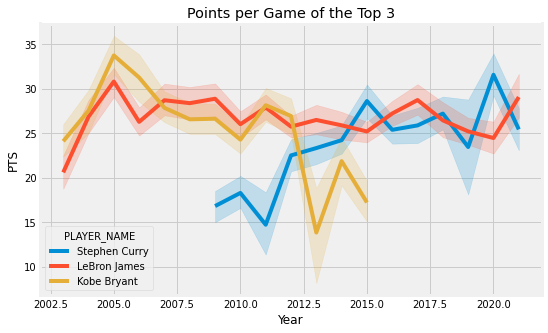

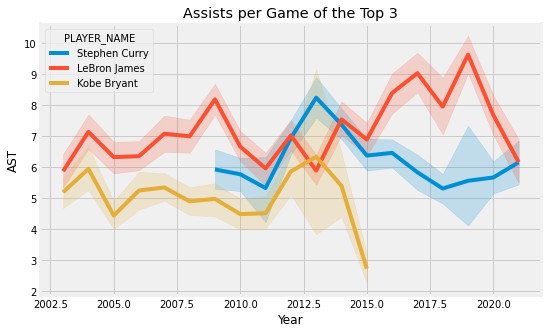

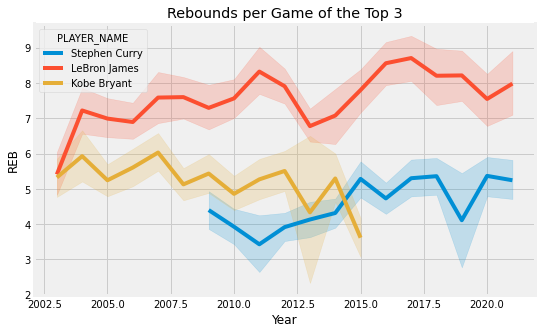

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='PTS', hue='PLAYER_NAME', data=games_details)
plt.title('Points per Game of the Top 3')
plt.show()

plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='AST', hue='PLAYER_NAME', data=games_details)
plt.title('Assists per Game of the Top 3')
plt.show()

plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='REB', hue='PLAYER_NAME', data=games_details)
plt.title('Rebounds per Game of the Top 3')
plt.show()

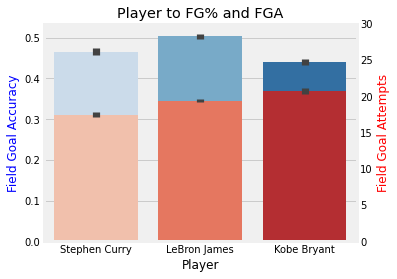

In [ ]:
fig, ax1 = plt.subplots(figsize=(5,4))

ax2 = ax1.twinx()
ax2.grid(b=False)

sns.barplot(ax=ax1, x='PLAYER_NAME', y='FG_PCT', data=games_details, palette="Blues")
sns.barplot(ax=ax2, x='PLAYER_NAME', y='FGA', data=games_details,palette="Reds")

ax2.set_ylim([0,30])

ax1.set_xlabel('Player')
ax1.set_ylabel('Field Goal Accuracy', color='b')
ax2.set_ylabel('Field Goal Attempts', color='r')

plt.title('Player to FG% and FGA')
plt.show()

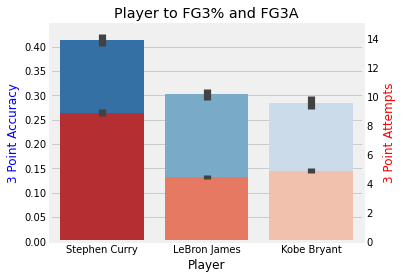

In [ ]:
fig, ax1 = plt.subplots(figsize=(5,4))

ax2 = ax1.twinx()
ax2.grid(b=False)

sns.barplot(ax=ax1, x='PLAYER_NAME', y='FG3_PCT', data=games_details, palette="Blues_r")
sns.barplot(ax=ax2, x='PLAYER_NAME', y='FG3A', data=games_details,palette="Reds_r")

ax2.set_ylim([0,15])

ax1.set_xlabel('Player')
ax1.set_ylabel('3 Point Accuracy', color='b')
ax2.set_ylabel('3 Point Attempts', color='r')

plt.title('Player to FG3% and FG3A')
plt.show()

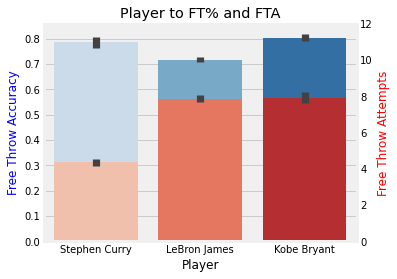

In [ ]:
fig, ax1 = plt.subplots(figsize=(5,4))

ax2 = ax1.twinx()
ax2.grid(b=False)

sns.barplot(ax=ax1, x='PLAYER_NAME', y='FT_PCT', data=games_details, palette="Blues")
sns.barplot(ax=ax2, x='PLAYER_NAME', y='FTA', data=games_details,palette="Reds")

ax2.set_ylim([0,12])

ax1.set_xlabel('Player')
ax1.set_ylabel('Free Throw Accuracy', color='b')
ax2.set_ylabel('Free Throw Attempts', color='r')

plt.title('Player to FT% and FTA')
plt.show()

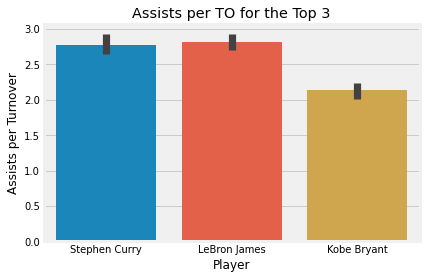

In [ ]:
games_details1 = games_details.copy()
games_details1['TO'] = games_details1['TO'].replace(0, 1)
games_details1['Assists per Turnover'] = games_details1['AST'] / games_details1['TO']

sns.barplot(x='PLAYER_NAME', y='Assists per Turnover', data=games_details1)
plt.xlabel('Player')
plt.title('Assists per TO for the Top 3')
plt.show()

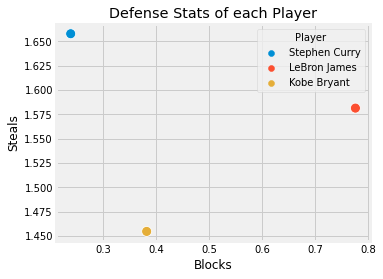

In [ ]:
players = ['Stephen Curry', 'LeBron James', 'Kobe Bryant']
steals = [np.mean(games_details[games_details['PLAYER_NAME']==p]['STL']) for p in players]
blocks = [np.mean(games_details[games_details['PLAYER_NAME']==p]['BLK']) for p in players]

defense = pd.DataFrame({
    'Player':players,
    'Steals':steals,
    'Blocks':blocks
})

plt.figure(figsize=(5,4))
sns.scatterplot(x='Blocks', y='Steals', hue='Player', data=defense, s=100)
plt.title('Defense Stats of each Player')
plt.show()

In [ ]:
oppFGP = []
oppFG3P = []
for ind in games_details.index:
  gameId = games_details['GAME_ID'][ind]
  teamId = games_details['TEAM_ID'][ind]

  theGame = games[games['GAME_ID']==gameId]
  if len(theGame) > 1: 
    theGame = theGame.iloc[0]

  if int(theGame['TEAM_ID_home'])==teamId:
    oppFGP.append(float(theGame['FG_PCT_away']))
    oppFG3P.append(float(theGame['FG3_PCT_away']))
  elif int(theGame['TEAM_ID_away'])==teamId:
    oppFGP.append(float(theGame['FG_PCT_home']))
    oppFG3P.append(float(theGame['FG3_PCT_home']))

games_details['Opponent FG%'] = np.array(oppFGP)
games_details['Opponent 3 Point %'] = np.array(oppFG3P)

print(games_details)

         GAME_ID     TEAM_ID TEAM_ABBREVIATION     TEAM_CITY  PLAYER_ID  \
87      22101008  1610612744               GSW  Golden State     201939   
405     22101004  1610612747               LAL   Los Angeles       2544   
445     22100994  1610612744               GSW  Golden State     201939   
568     22100985  1610612747               LAL   Los Angeles       2544   
896     22100980  1610612744               GSW  Golden State     201939   
...          ...         ...               ...           ...        ...   
645254  11200042  1610612747               LAL   Los Angeles        977   
645537  11200028  1610612748               MIA         Miami       2544   
645806  11200013  1610612744               GSW  Golden State     201939   
645861  11200008  1610612748               MIA         Miami       2544   
645907  11200009  1610612747               LAL   Los Angeles        977   

          PLAYER_NAME NICKNAME START_POSITION COMMENT    MIN  ...  STL  BLK  \
87      Stephen Curr

In [ ]:
def min_to_num(min1):
  try:
    minL = min1.split(':')
    num = float(minL[0]) + float(minL[1])/60
    return num
  except:
    return float(min1)

games_details['MIN_F'] = games_details['MIN'].apply(lambda min1: min_to_num(min1))
print(games_details)

         GAME_ID     TEAM_ID TEAM_ABBREVIATION     TEAM_CITY  PLAYER_ID  \
87      22101008  1610612744               GSW  Golden State     201939   
405     22101004  1610612747               LAL   Los Angeles       2544   
445     22100994  1610612744               GSW  Golden State     201939   
568     22100985  1610612747               LAL   Los Angeles       2544   
896     22100980  1610612744               GSW  Golden State     201939   
...          ...         ...               ...           ...        ...   
645254  11200042  1610612747               LAL   Los Angeles        977   
645537  11200028  1610612748               MIA         Miami       2544   
645806  11200013  1610612744               GSW  Golden State     201939   
645861  11200008  1610612748               MIA         Miami       2544   
645907  11200009  1610612747               LAL   Los Angeles        977   

          PLAYER_NAME NICKNAME START_POSITION COMMENT    MIN  ...  BLK   TO  \
87      Stephen Curr

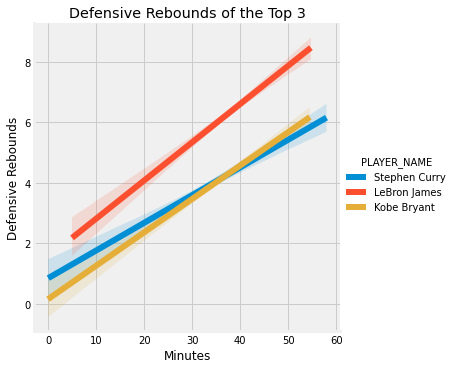

In [ ]:
sns.lmplot(x='MIN_F', y='DREB', hue='PLAYER_NAME', scatter=False, data=games_details) 
plt.xlabel('Minutes')
plt.ylabel('Defensive Rebounds') 
plt.title('Defensive Rebounds of the Top 3')
plt.show()

In [ ]:
games_details['Total Defense'] = games_details['BLK'] + games_details['STL']
print(games_details)

         GAME_ID     TEAM_ID TEAM_ABBREVIATION     TEAM_CITY  PLAYER_ID  \
87      22101008  1610612744               GSW  Golden State     201939   
405     22101004  1610612747               LAL   Los Angeles       2544   
445     22100994  1610612744               GSW  Golden State     201939   
568     22100985  1610612747               LAL   Los Angeles       2544   
896     22100980  1610612744               GSW  Golden State     201939   
...          ...         ...               ...           ...        ...   
645254  11200042  1610612747               LAL   Los Angeles        977   
645537  11200028  1610612748               MIA         Miami       2544   
645806  11200013  1610612744               GSW  Golden State     201939   
645861  11200008  1610612748               MIA         Miami       2544   
645907  11200009  1610612747               LAL   Los Angeles        977   

          PLAYER_NAME NICKNAME START_POSITION COMMENT    MIN  ...   TO   PF  \
87      Stephen Curr

In [ ]:
lebron = np.array(games_details[games_details['PLAYER_NAME']=='LeBron James']['Total Defense'])
curry = np.array(games_details[games_details['PLAYER_NAME']=='Stephen Curry']['Total Defense'])
kobe = np.array(games_details[games_details['PLAYER_NAME']=='Kobe Bryant']['Total Defense'])

def to_percentile(player, defense):
  if player == 'LeBron James':
    return percentileofscore(lebron, defense)
  elif player == 'Stephen Curry':
    return percentileofscore(curry, defense)
  elif player == 'Kobe Bryant':
    return percentileofscore(kobe, defense)

percentiles = []
for ind in games_details.index:
  player = games_details['PLAYER_NAME'][ind]
  defense = games_details['Total Defense'][ind]
  percentiles.append(to_percentile(player, defense))

games_details['Defense Percentile'] = np.array(percentiles) 
print(games_details)

         GAME_ID     TEAM_ID TEAM_ABBREVIATION     TEAM_CITY  PLAYER_ID  \
87      22101008  1610612744               GSW  Golden State     201939   
405     22101004  1610612747               LAL   Los Angeles       2544   
445     22100994  1610612744               GSW  Golden State     201939   
568     22100985  1610612747               LAL   Los Angeles       2544   
896     22100980  1610612744               GSW  Golden State     201939   
...          ...         ...               ...           ...        ...   
645254  11200042  1610612747               LAL   Los Angeles        977   
645537  11200028  1610612748               MIA         Miami       2544   
645806  11200013  1610612744               GSW  Golden State     201939   
645861  11200008  1610612748               MIA         Miami       2544   
645907  11200009  1610612747               LAL   Los Angeles        977   

          PLAYER_NAME NICKNAME START_POSITION COMMENT    MIN  ...   PF   PTS  \
87      Stephen Cur

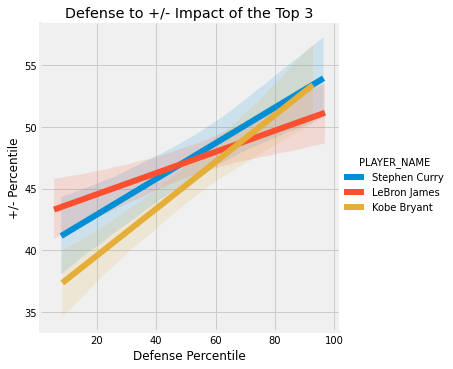

In [ ]:
lebron = np.array(games_details[games_details['PLAYER_NAME']=='LeBron James']['PLUS_MINUS'])
curry = np.array(games_details[games_details['PLAYER_NAME']=='Stephen Curry']['PLUS_MINUS'])
kobe = np.array(games_details[games_details['PLAYER_NAME']=='Kobe Bryant']['PLUS_MINUS'])

def to_percentile(player, plusminus):
  if player == 'LeBron James':
    return percentileofscore(lebron, plusminus)
  elif player == 'Stephen Curry':
    return percentileofscore(curry, plusminus)
  elif player == 'Kobe Bryant':
    return percentileofscore(kobe, plusminus)

percentiles = []
for ind in games_details.index:
  player = games_details['PLAYER_NAME'][ind]
  plusminus = games_details['PLUS_MINUS'][ind]
  percentiles.append(to_percentile(player, plusminus))

games_details['+/- Percentile'] = np.array(percentiles) 

sns.lmplot(x='Defense Percentile', y='+/- Percentile', hue='PLAYER_NAME', scatter=False, data=games_details)
plt.title('Defense to +/- Impact of the Top 3')
plt.show()

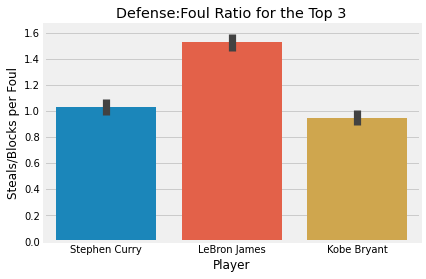

In [ ]:
games_details1 = games_details.copy()
games_details1['PF'] = games_details1['PF'].replace(0, 1)
games_details1['Steals/Blocks per Foul'] = games_details1['Total Defense'] / games_details1['PF']

sns.barplot(x='PLAYER_NAME', y='Steals/Blocks per Foul', data=games_details1)
plt.xlabel('Player')
plt.title('Defense:Foul Ratio for the Top 3')
plt.show()